В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
2. Проведите первичный анализ.
а) Проверьте количество записей для каждого класса. Сделайте вывод.
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).
6. Обработайте выбросы в данных.
а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?
b) Исследуйте признаки на выбросы несколькими способами.
c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.
7. Повторите п. 4, п. 5.
8. Сформулируйте выводы по проделанной работе.
а) Кратко опишите, какие преобразования были сделаны с данными.
b) Сравните точность двух моделей.
c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [19]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Видно, что классы несбалансированы. В классе 2 почти в 8.5 раз больше записей чем в классе 6

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [20]:
y = data['Type']
X = data.drop(['Type'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

In [26]:
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [29]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy:.2f}")

0.72


Обработайте выбросы в данных.
а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?
b) Исследуйте признаки на выбросы несколькими способами.
c) Удалите выбросы.

<Axes: >

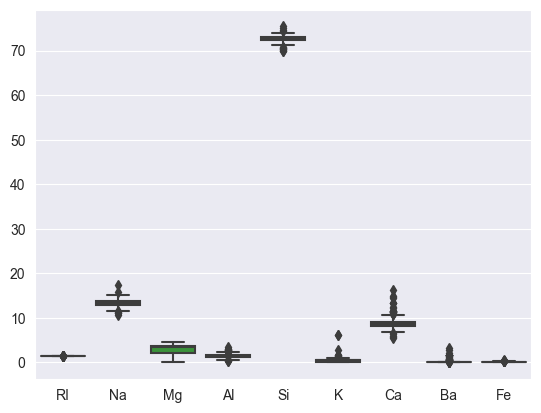

In [9]:
sns.boxplot(data=data.drop(['Type'], axis=1))

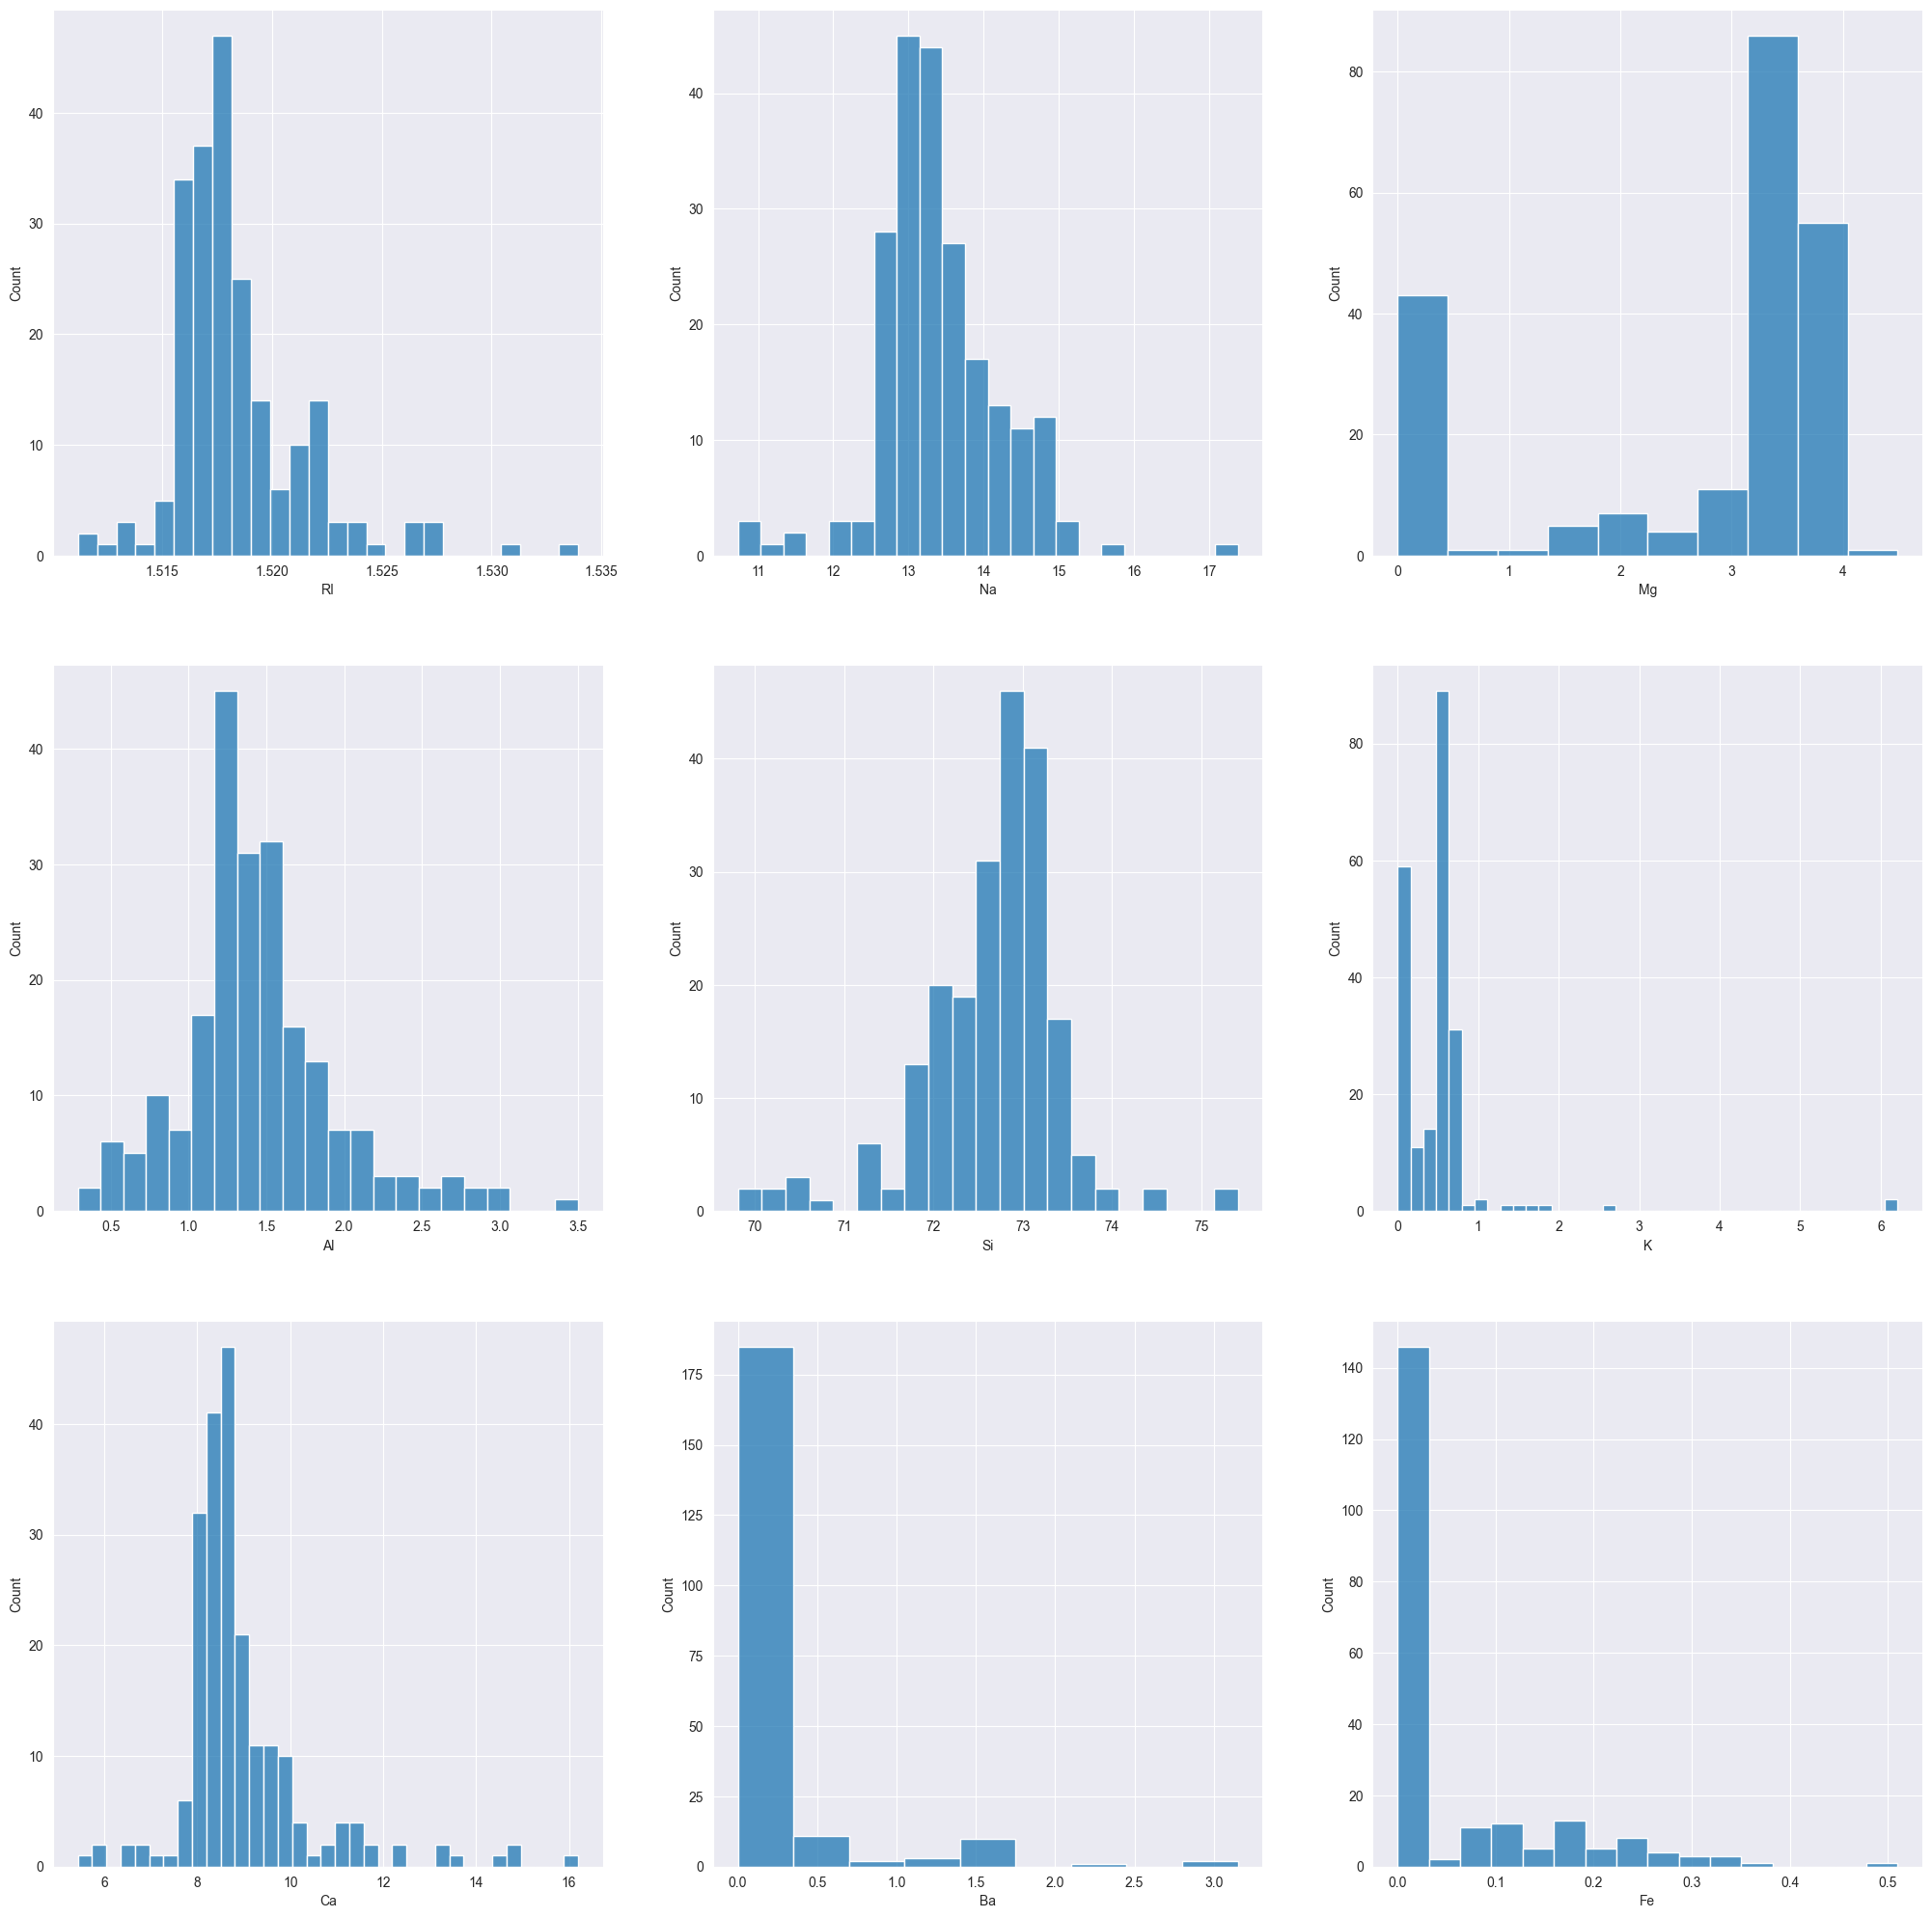

In [10]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(25, 25)

for i, column in enumerate(data.drop(["Type"], axis=1).columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(data[column])

In [30]:
data = pd.read_csv('glass.csv')
def replace_outlier(x, m, std, n=3):
    if x < m-n*std:
        return m-n*std
    elif x > m+n*std:
        return m+n*std
    else:
        return x

for c in data.drop(["Type"], axis=1).columns:
    std = data[c].std()
    mean = data[c].mean()
    data[c] = data[c].apply(lambda x: replace_outlier(x, mean, std, 2))

повторите п. 4, п. 5.

In [31]:
y = data['Type']
X = data.drop(['Type'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy:.2f}")

0.79


## ВЫВОД
проведен анализ рспределения переменных (через гистограммы и боксплот)
выявлено, что почти все переменные имеют выбросы
для обработки выбросов использовался подход на основе средней и стандартного отклонения
в результате обработки выбросов точность модели увеличилась с 0.72 до 0.79